# Practice Chapter 2

In [63]:
import pyro
import torch
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

### 2M1

Recall the globe tossing model from the chapter. Compute and plot the grid approximate posterior distribution for each of the following sets of observations. In each case, assume a uniform prior for p.
1. W, W, W
2. W, W, W, L
3. L, W, W, L, W, W, W

In [106]:
def likelihood_discreticed(
    sequence: list, grit: list = np.linspace(0.0, 1.0, num=20)
) -> list:
    counts = Counter(sequence)
    return pyro.distributions.Binomial(
         total_count=len(sequence),
        probs=torch.tensor(grit)
     ).log_prob(torch.tensor(float(counts['W']))).exp().numpy()


def plot_posterior(likelihood: np.array, prior: np.array, label: str = None) -> None:
    sns.lineplot(
        x="probability of water",
        y="posterior probability",
        label=label,
        data={
            'probability of water': grit,
            'posterior probability': likelihood * prior / np.sum(likelihood * prior),
        }
    )

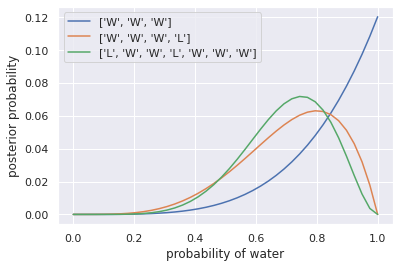

In [108]:
sequences = [
    ['W', 'W', 'W'],
    ['W', 'W', 'W', 'L'],
    ['L', 'W', 'W', 'L', 'W', 'W', 'W']
]

for seq in sequences:
    grit = np.linspace(0, 1, num=40)

    prior = grit
    likelihood = likelihood_discreticed(seq, grit=grit)
    plot_posterior(likelihood, prior, label=str(seq))
plt.gca().legend()